In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

In [3]:
dataset = xr.open_dataset("subset.nc", engine="netcdf4")
dataset

<xarray.Dataset>
Dimensions:  (time: 14611, lat: 100, lon: 160)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2021-09-01
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.12 99.38 99.62 99.88
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Fri Jul 22 22:44:49 2022: ncrcat -O -d time,1981-09-01 00...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [4]:
Time=dataset.sst.time[:14368].data      #1D ##removin year 2021 from the data
Latitude=dataset.sst.lat.data     #1D
Longitude=dataset.sst.lon.data    #1D
sea_surface_temp=dataset.sst.data  #3D

In [5]:
TimeDF=pd.DataFrame(Time,columns=['Time'])

In [6]:
sea_surface_tempDF=pd.DataFrame(sea_surface_temp[:14368,0,0],columns=['sea_surface_temp'])

In [7]:
time_sst=pd.concat([TimeDF,sea_surface_tempDF],axis=1)

In [8]:
time_sst ##time series for sst at (lat[0],lon[0])

,Time,sea_surface_temp
0,1981-09-01,29.019999
1,1981-09-02,28.869999
2,1981-09-03,28.799999
3,1981-09-04,28.150000
4,1981-09-05,28.109999
...,...,...
14363,2020-12-28,28.359999
14364,2020-12-29,28.490000
14365,2020-12-30,28.689999
14366,2020-12-31,28.779999


In [9]:
## Finding 90 percentile for each lat,lon pair and storing in a list,further we will convert this list into 2d array 
percentile_list=[]
for i in range(0,100):
    for j in range(0,160):
        percentile_list.append(np.percentile(dataset.sst[:14368,i,j].data,90))

In [10]:
nintey_percentile=np.array(percentile_list).reshape(100,160) #reshaping into original format

## Hence we got the value of 90 percentile with the help of lat 40 year data for everylat lon pair(1981-2020)

nintey_percentile

array([[30.1099987 , 30.11999893, 30.11999893, ..., 30.45999908,
        30.46999931,         nan],
       [30.1099987 , 30.1099987 , 30.11999893, ...,         nan,
                nan,         nan],
       [30.1099987 , 30.1099987 , 30.1099987 , ...,         nan,
                nan,         nan],
       ...,
       [30.50300007, 30.32999992, 30.15999985, ...,         nan,
                nan,         nan],
       [30.56999969, 30.4299984 , 30.27999878, ...,         nan,
                nan,         nan],
       [30.63999939, 30.51999855, 30.39999962, ...,         nan,
                nan,         nan]])

In [11]:
dataset21=xr.open_dataset("sst.day.mean.2021.nc", engine="netcdf4") ## SST data for 2021

In [12]:
dataset21

<xarray.Dataset>
Dimensions:  (time: 365, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [13]:
#slicing the indian ocean

In [14]:
datasetsst21=dataset21.sst.sel(lon=slice(60,100),lat=slice(0,25))
datasetsst21

<xarray.DataArray 'sst' (time: 365, lat: 100, lon: 160)>
[5840000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.12 99.38 99.62 99.88
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  35.19]

In [15]:
## marking boolean for all sst greater then 90 percentile
x=[]
for k in range(len(datasetsst21.time.data)):
    x.append(np.greater(datasetsst21[k].data,nintey_percentile))
    

In [37]:
## converting 2d list into 3d array and bool into binary(1,0)
logic_mhw=np.array(x).astype(int)

In [38]:
## creating a dataArray with bool
logic_mhw_xr=xr.DataArray(logic_mhw, coords=[("time",datasetsst21.time.data),("lat", Latitude), ("lon", Longitude)])

In [39]:
## converting in time series
new_table=pd.concat([pd.DataFrame(logic_mhw_xr.time.data,columns=['Time']),pd.DataFrame(logic_mhw[:,0,0],columns=['logic_mhw'])],axis=1)

In [40]:
new_table['logic_mhw'].value_counts() ## value greater then 5 henve there is chance of detecting mhw

0    339
1     26
Name: logic_mhw, dtype: int64

<AxesSubplot:xlabel='Time'>

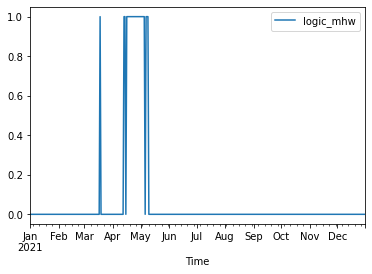

In [41]:
new_table.plot(x='Time',y='logic_mhw',kind='line')

<AxesSubplot:xlabel='Time'>

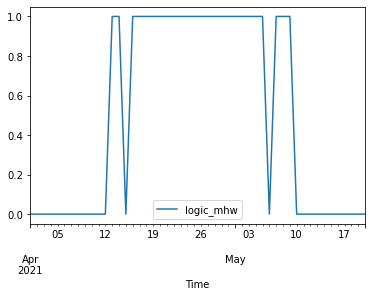

In [45]:
new_table[90:140].plot(x='Time',y='logic_mhw',kind='line')

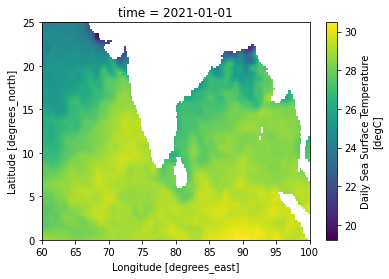

In [50]:
datasetsst21[0].plot()-

In [56]:
nintey_percentile_xr=xr.DataArray(nintey_percentile,coords={
        "lat": datasetsst21.lat.data,
        "lon": datasetsst21.lon.data,
    },)

In [58]:
diff=datasetsst21[0]-nintey_percentile_xr

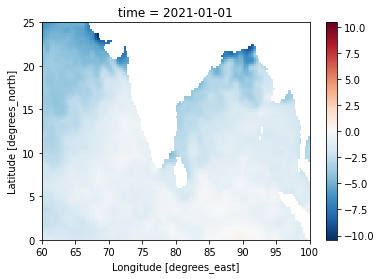

In [59]:
diff.plot()